<a href="https://colab.research.google.com/github/lucaslapazini95/projetos_pyspark_soulcode/blob/main/projeto_tratamento_pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 kB 13.7 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824028 sha256=4c5452d6f6d0c45b59db2e22fea7df106c38ce7c04b905e4cdded1d324cd39d3
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [ ]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Configurar a variável de ambiente(Sessão)

spark = (SparkSession.builder
         .master('local')
         .appName('ad1_pratica')
         .config('spark.ui.port', '4050')
         .getOrCreate())

In [ ]:
#Importar o dataset do drive

df = (
    spark.read
         .format('csv')
         .option('delimiter', ',')
         .option('header', 'true')
         .option('inferschema', 'true')
         .load('/content/drive/MyDrive/Fontes de dados/Tratados/dataset.csv')
)

In [ ]:
#VISUALIZAR AS COLUNAS
df.printSchema()

root
 |-- customerid: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- salary: integer (nullable = true)
 |-- balance: integer (nullable = true)
 |-- marital: string (nullable = true)
 |-- jobedu: string (nullable = true)
 |-- targeted: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: string (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- response: string (nullable = true)



In [ ]:
len(df.columns)

19

In [ ]:
#SHAPE
print(f'({df.count()}, {len(df.columns)})')

(45211, 19)


In [ ]:
#AMOSTRA DOS DADOS
df.show()

+----------+---+------+-------+--------+--------------------+--------+-------+-------+----+-------+---+---------+--------+--------+-----+--------+--------+--------+
|customerid|age|salary|balance| marital|              jobedu|targeted|default|housing|loan|contact|day|    month|duration|campaign|pdays|previous|poutcome|response|
+----------+---+------+-------+--------+--------------------+--------+-------+-------+----+-------+---+---------+--------+--------+-----+--------+--------+--------+
|         1| 58|100000|   2143| married| management,tertiary|     yes|     no|    yes|  no|unknown|  5|may, 2017| 261 sec|       1|   -1|       0| unknown|      no|
|         2| 44| 60000|     29|  single|technician,secondary|     yes|     no|    yes|  no|unknown|  5|may, 2017| 151 sec|       1|   -1|       0| unknown|      no|
|         3| 33|120000|      2| married|entrepreneur,seco...|     yes|     no|    yes| yes|unknown|  5|may, 2017|  76 sec|       1|   -1|       0| unknown|      no|
|         

In [ ]:
df.select(F.col('contact')).distinct().show()

+---------+
|  contact|
+---------+
|  unknown|
| cellular|
|telephone|
+---------+



In [ ]:
df.select(F.col('poutcome')).distinct().show()

+--------+
|poutcome|
+--------+
| success|
| unknown|
|   other|
| failure|
+--------+



In [ ]:
df.select(F.col('previous')).distinct().show()

+--------+
|previous|
+--------+
|      28|
|      26|
|      27|
|      12|
|      22|
|       1|
|      13|
|      16|
|       6|
|       3|
|      20|
|      40|
|       5|
|      19|
|      41|
|      15|
|      37|
|       9|
|      17|
|      35|
+--------+
only showing top 20 rows



In [ ]:
#Fazer uma verificação das variáveis (média, mediana, valor mínimo, valor máximo)

#pode ser feito só com df.summary().show()

In [ ]:
df.select('age', 'salary', 'balance').summary().show()

+-------+------------------+-----------------+------------------+
|summary|               age|           salary|           balance|
+-------+------------------+-----------------+------------------+
|  count|             45191|            45185|             45211|
|   mean| 40.93565090394105|57008.65331415293|1362.2720576850766|
| stddev|10.619197578972605| 32086.0285215707|3044.7658291685257|
|    min|                18|                0|             -8019|
|    25%|                33|            20000|                72|
|    50%|                39|            60000|               448|
|    75%|                48|            70000|              1426|
|    max|                95|           120000|            102127|
+-------+------------------+-----------------+------------------+



In [ ]:
df.select('duration', 'pdays', 'previous').summary().show()

+-------+--------+------------------+------------------+
|summary|duration|             pdays|          previous|
+-------+--------+------------------+------------------+
|  count|   45211|             45211|             45211|
|   mean|    null| 40.19782796222158|0.5803233726305546|
| stddev|    null|100.12874599059828| 2.303441044931218|
|    min|   0 min|                -1|                 0|
|    25%|    null|                -1|                 0|
|    50%|    null|                -1|                 0|
|    75%|    null|                -1|                 0|
|    max| 999 sec|               871|               275|
+-------+--------+------------------+------------------+



In [ ]:
#VISUALIZAR AS COLUNAS
df.printSchema()

root
 |-- customerid: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- salary: integer (nullable = true)
 |-- balance: integer (nullable = true)
 |-- marital: string (nullable = true)
 |-- jobedu: string (nullable = true)
 |-- targeted: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: string (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- response: string (nullable = true)



In [ ]:
lista_colunas = ['age', 'salary', 'balance', 'day', 'campaign', 'pdays', 'previous']
df.select(lista_colunas).summary().show()

+-------+------------------+-----------------+------------------+-----------------+-----------------+------------------+------------------+
|summary|               age|           salary|           balance|              day|         campaign|             pdays|          previous|
+-------+------------------+-----------------+------------------+-----------------+-----------------+------------------+------------------+
|  count|             45191|            45185|             45211|            45211|            45211|             45211|             45211|
|   mean| 40.93565090394105|57008.65331415293|1362.2720576850766|15.80641879188693|2.763840658246887| 40.19782796222158|0.5803233726305546|
| stddev|10.619197578972605| 32086.0285215707|3044.7658291685257|8.322476153044594|3.098020883279192|100.12874599059828| 2.303441044931218|
|    min|                18|                0|             -8019|                1|                1|                -1|                 0|
|    25%|           

In [ ]:
#Verificar nas colunas se possuem valores nulos
df.toPandas().isna().any()

customerid    False
age            True
salary         True
balance       False
marital       False
jobedu        False
targeted      False
default       False
housing       False
loan          False
contact       False
day           False
month          True
duration      False
campaign      False
pdays         False
previous      False
poutcome      False
response       True
dtype: bool

In [ ]:
#Verificar nas colunas a quantidade de valores nulos
df.toPandas().isna().sum()

customerid     0
age           20
salary        26
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

In [ ]:
#VERIFICAR SE NAS COLUNAS POSSUEM VALORES NULOS COM O Pyspark - Valores nulos NULL
df.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+----------+---+------+-------+-------+------+--------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+--------+
|customerid|age|salary|balance|marital|jobedu|targeted|default|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|response|
+----------+---+------+-------+-------+------+--------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+--------+
|         0| 20|    26|      0|      0|     0|       0|      0|      0|   0|      0|  0|   50|       0|       0|    0|       0|       0|      30|
+----------+---+------+-------+-------+------+--------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+--------+



In [ ]:
#DROP DE COLUNAS QUE NÃO TEM UTILIDADE
#id só tem utilidade no banco de dados, na análise não é o caso
df=df.drop(F.col('customerid'))

In [ ]:
#SEPARAR A COLUNA job da coluna education (jobedu)
#CRIAR COLUNA JOB - split(F.col(), separador).getItem(0)
#CRIAR COLUNA EDUCATION - split(F.col(), separador).getItem(1)

df = (df.withColumn('job', F.split(df['jobedu'], ',').getItem(0))
        .withColumn('education', F.split(df['jobedu'], ',').getItem(1)))

In [ ]:
df.show()

+---+------+-------+--------+--------------------+--------+-------+-------+----+-------+---+---------+--------+--------+-----+--------+--------+--------+------------+---------+
|age|salary|balance| marital|              jobedu|targeted|default|housing|loan|contact|day|    month|duration|campaign|pdays|previous|poutcome|response|         job|education|
+---+------+-------+--------+--------------------+--------+-------+-------+----+-------+---+---------+--------+--------+-----+--------+--------+--------+------------+---------+
| 58|100000|   2143| married| management,tertiary|     yes|     no|    yes|  no|unknown|  5|may, 2017| 261 sec|       1|   -1|       0| unknown|      no|  management| tertiary|
| 44| 60000|     29|  single|technician,secondary|     yes|     no|    yes|  no|unknown|  5|may, 2017| 151 sec|       1|   -1|       0| unknown|      no|  technician|secondary|
| 33|120000|      2| married|entrepreneur,seco...|     yes|     no|    yes| yes|unknown|  5|may, 2017|  76 sec|    

In [ ]:
#DROPAR COLUNA JOBEDU
df = df.drop(F.col('jobedu'))

In [ ]:
#ENCONTRAR A QUANTIDADE DE VALORES AUSENTES DA COLUNA AGE
df.filter(F.col('age').isNull() | F.isnan(F.col('age'))).count()

20

In [ ]:
#CALCULAR O PERCENTUAL DE VALORES AUSENTES NA VARIÁVEL AGE
media = (df.filter(F.col('age').isNull() | F.isnan(F.col('age'))).count() / df.select('age').count() * 100)

print(media)

0.0442370219636814


Verificamos que o percentual de valores ausentes na coluna AGE é 0,04%. Para que eu pudesse excluir a coluna da análise, ela deveria ter no mínimo 30% de valores ausentes. Não podemos dropar a coluna nesse caso.

O que resta fazer?

Eliminar os registros (linhas)
Imputação - Colocar algum valor no lugar dos nulos. Podemos colocar em grande parte dos casos uma MEDIDA DE TENDÊNCIA CENTRAL (média, mediana, moda)

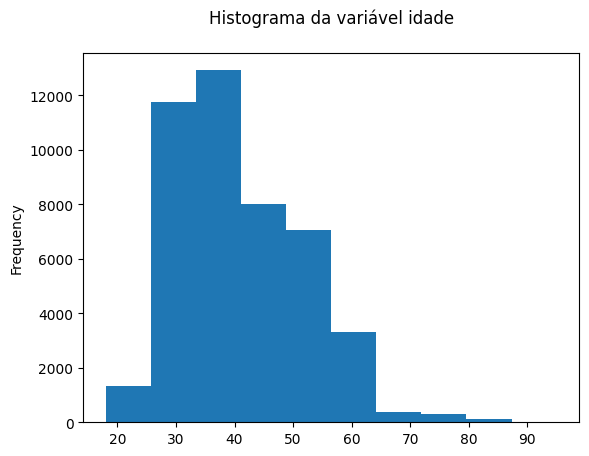

In [ ]:
#Histograma da idade
df.toPandas().age.plot(kind='hist')
plt.title('Histograma da variável idade\n')
plt.show()

In [ ]:
#Se for distribuição normal (formato de sino, simétrico) usa-se a média
#mediana é o valor que representa o meio, o 50%
#moda é o valor que aparece com mais frequência

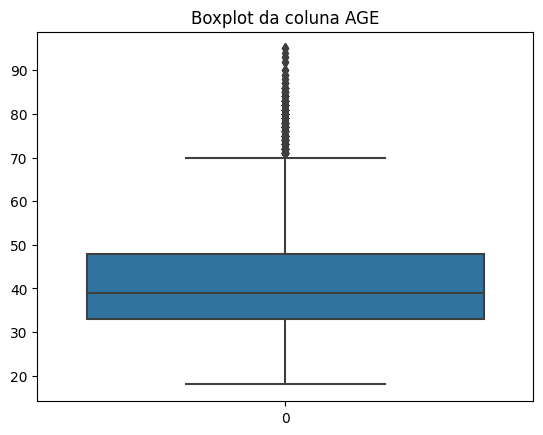

In [ ]:
#BOXPLOT DA COLUNA AGE
sns.boxplot(df.toPandas().age)
plt.title("Boxplot da coluna AGE")
plt.show()

In [ ]:
#o boxplot mostra os outliers.

In [ ]:
#média de idade
df.select(F.avg('age')).show()

+-----------------+
|         avg(age)|
+-----------------+
|40.93565090394105|
+-----------------+



In [ ]:
#mediana de idade
df.select(F.percentile_approx(F.col('age'), 0.5)).show()

+----------------------------------+
|percentile_approx(age, 0.5, 10000)|
+----------------------------------+
|                                39|
+----------------------------------+



In [ ]:
#moda de idade
df.toPandas().age.mode()

0    32.0
Name: age, dtype: float64

In [ ]:
#Backup do DF
df_backup = df

In [ ]:
#IREMOS ESCOLHER A MODA, POIS SÃO POUCOS REGISTROS E ISSO NÃO IRÁ CAUSAR UM IMPACTO
df = df.fillna(32, subset='age')

In [ ]:
#VAMOS CALCULAR A MÉDIA DA IDADE
df.select(F.avg('age')).show()

+-----------------+
|         avg(age)|
+-----------------+
|40.93169803808808|
+-----------------+



In [ ]:
#VAMOS CALCULAR A MEDIANA
#df.select(F.percentile_approx(F.col('age'), 0.5)).show()
df.toPandas().age.median()

39.0

In [ ]:
#CALCULAR O PERCENTUAL DE VALORES AUSENTES NA VARIÁVEL AGE
media = (df.filter(F.col('age').isNull() | F.isnan(F.col('age'))).count() / df.select('age').count() * 100)

print(media)

0.0


In [ ]:
#ENCONTRAR A QUANTIDADE DE VALORES AUSENTES DA COLUNA month
df.filter(F.col('month').isNull() | F.isnan(F.col('month'))).count()

50

In [ ]:
#CALCULAR O PERCENTUAL DE VALORES AUSENTES NA VARIÁVEL month
media = (df.filter(F.col('month').isNull() | F.isnan(F.col('month'))).count() / df.select('month').count() * 100)

print(media)

0.11059255490920351


In [ ]:
#Maio é a moda pois é o valor que mais aparece
df.groupBy('month').count().orderBy(F.col('count').desc()).show()

+---------+-----+
|    month|count|
+---------+-----+
|may, 2017|13747|
|jul, 2017| 6888|
|aug, 2017| 6240|
|jun, 2017| 5335|
|nov, 2017| 3968|
|apr, 2017| 2931|
|feb, 2017| 2646|
|jan, 2017| 1402|
|oct, 2017|  738|
|sep, 2017|  576|
|mar, 2017|  476|
|dec, 2017|  214|
|     null|   50|
+---------+-----+



In [ ]:
#IMPUTANDO OS VALORES NULOS DE month PARA A MODA may, 2017
df = df.fillna('may, 2017', subset='month')

In [ ]:
#Calcular a quantidade de valores ausentes em month
df.filter(F.col('month').isNull() | F.isnan(F.col('month'))).count()

0

In [ ]:
#Calcular a quantidade de valores ausentes em salary
df.filter(F.col('salary').isNull() | F.isnan(F.col('salary'))).count()

In [ ]:
#CALCULAR O PERCENTUAL DE VALORES AUSENTES NA VARIÁVEL salary
media = (df.filter(F.col('salary').isNull() | F.isnan(F.col('salary'))).count() / df.select('salary').count() * 100)

print(media)

0.05750812855278583
